[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Object Detection on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Object Detection, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/workspace


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 7974MiB)
Setup complete ✅ (48 CPUs, 251.6 GB RAM, 0.6/20.0 GB disk)


In [4]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [4]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/workspace
100%|██████████████████████████████████████| 6.23M/6.23M [00:00<00:00, 55.9MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 7974MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100%|█████████████████████████████████████████| 104k/104k [00:00<00:00, 545kB/s]
image 1/1 /workspace/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 98.7ms
Speed: 1.8ms preprocess, 98.7ms inference, 58.3ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


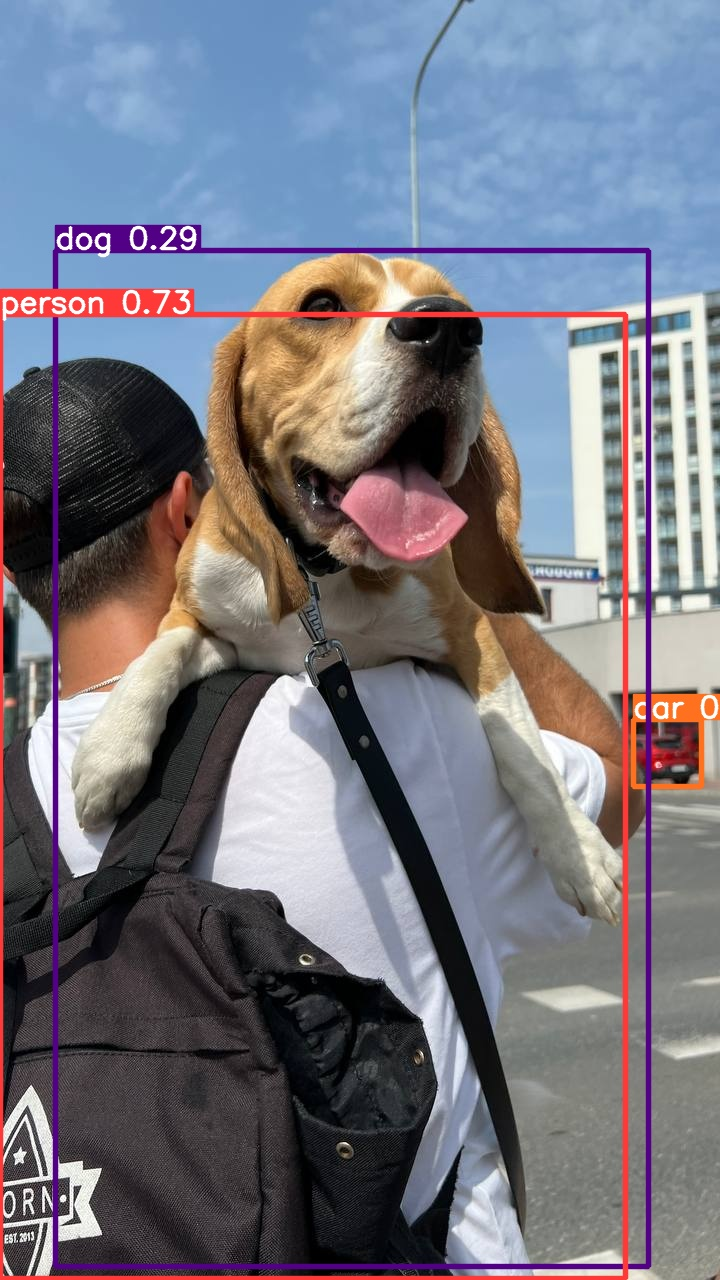

In [7]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [6]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /workspace/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 99.9ms
Speed: 1.9ms preprocess, 99.9ms inference, 55.9ms postprocess per image at shape (1, 3, 640, 384)


In [7]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4828,  625.0477, 1278.1790],
        [  55.2191,  250.0138,  648.1101, 1266.2408],
        [ 633.2263,  719.5449,  701.0593,  786.0349]], device='cuda:0')

In [8]:
results[0].boxes.conf

tensor([0.7270, 0.2910, 0.2844], device='cuda:0')

In [9]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://media.roboflow.com/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




In [10]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow

rf = Roboflow(api_key="6n4vryXJRgiaPTgLHstB")
project = rf.workspace("personal-ubphn").project("klt_detection")
version = project.version(3)
dataset = version.download("yolov8")

/workspace/datasets


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to klt_detection-3 in yolov8:: 100%|██████████| 476/476 [00:00<00:00, 10055.04it/s]


## Custom Training

In [11]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=100 imgsz=640,480 plots=True

/workspace
New https://pypi.org/project/ultralytics/8.2.16 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 7974MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/workspace/datasets/klt_detection-3/data.yaml, epochs=100, patience=50, batch=16, imgsz=(640, 480), save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, 

In [12]:
!ls {HOME}/runs/detect/train/

F1_curve.png			 labels.jpg		 train_batch1171.jpg
PR_curve.png			 labels_correlogram.jpg  train_batch1172.jpg
P_curve.png			 results.csv		 train_batch2.jpg
R_curve.png			 results.png		 val_batch0_labels.jpg
args.yaml			 train_batch0.jpg	 val_batch0_pred.jpg
confusion_matrix.png		 train_batch1.jpg	 weights
confusion_matrix_normalized.png  train_batch1170.jpg


/workspace


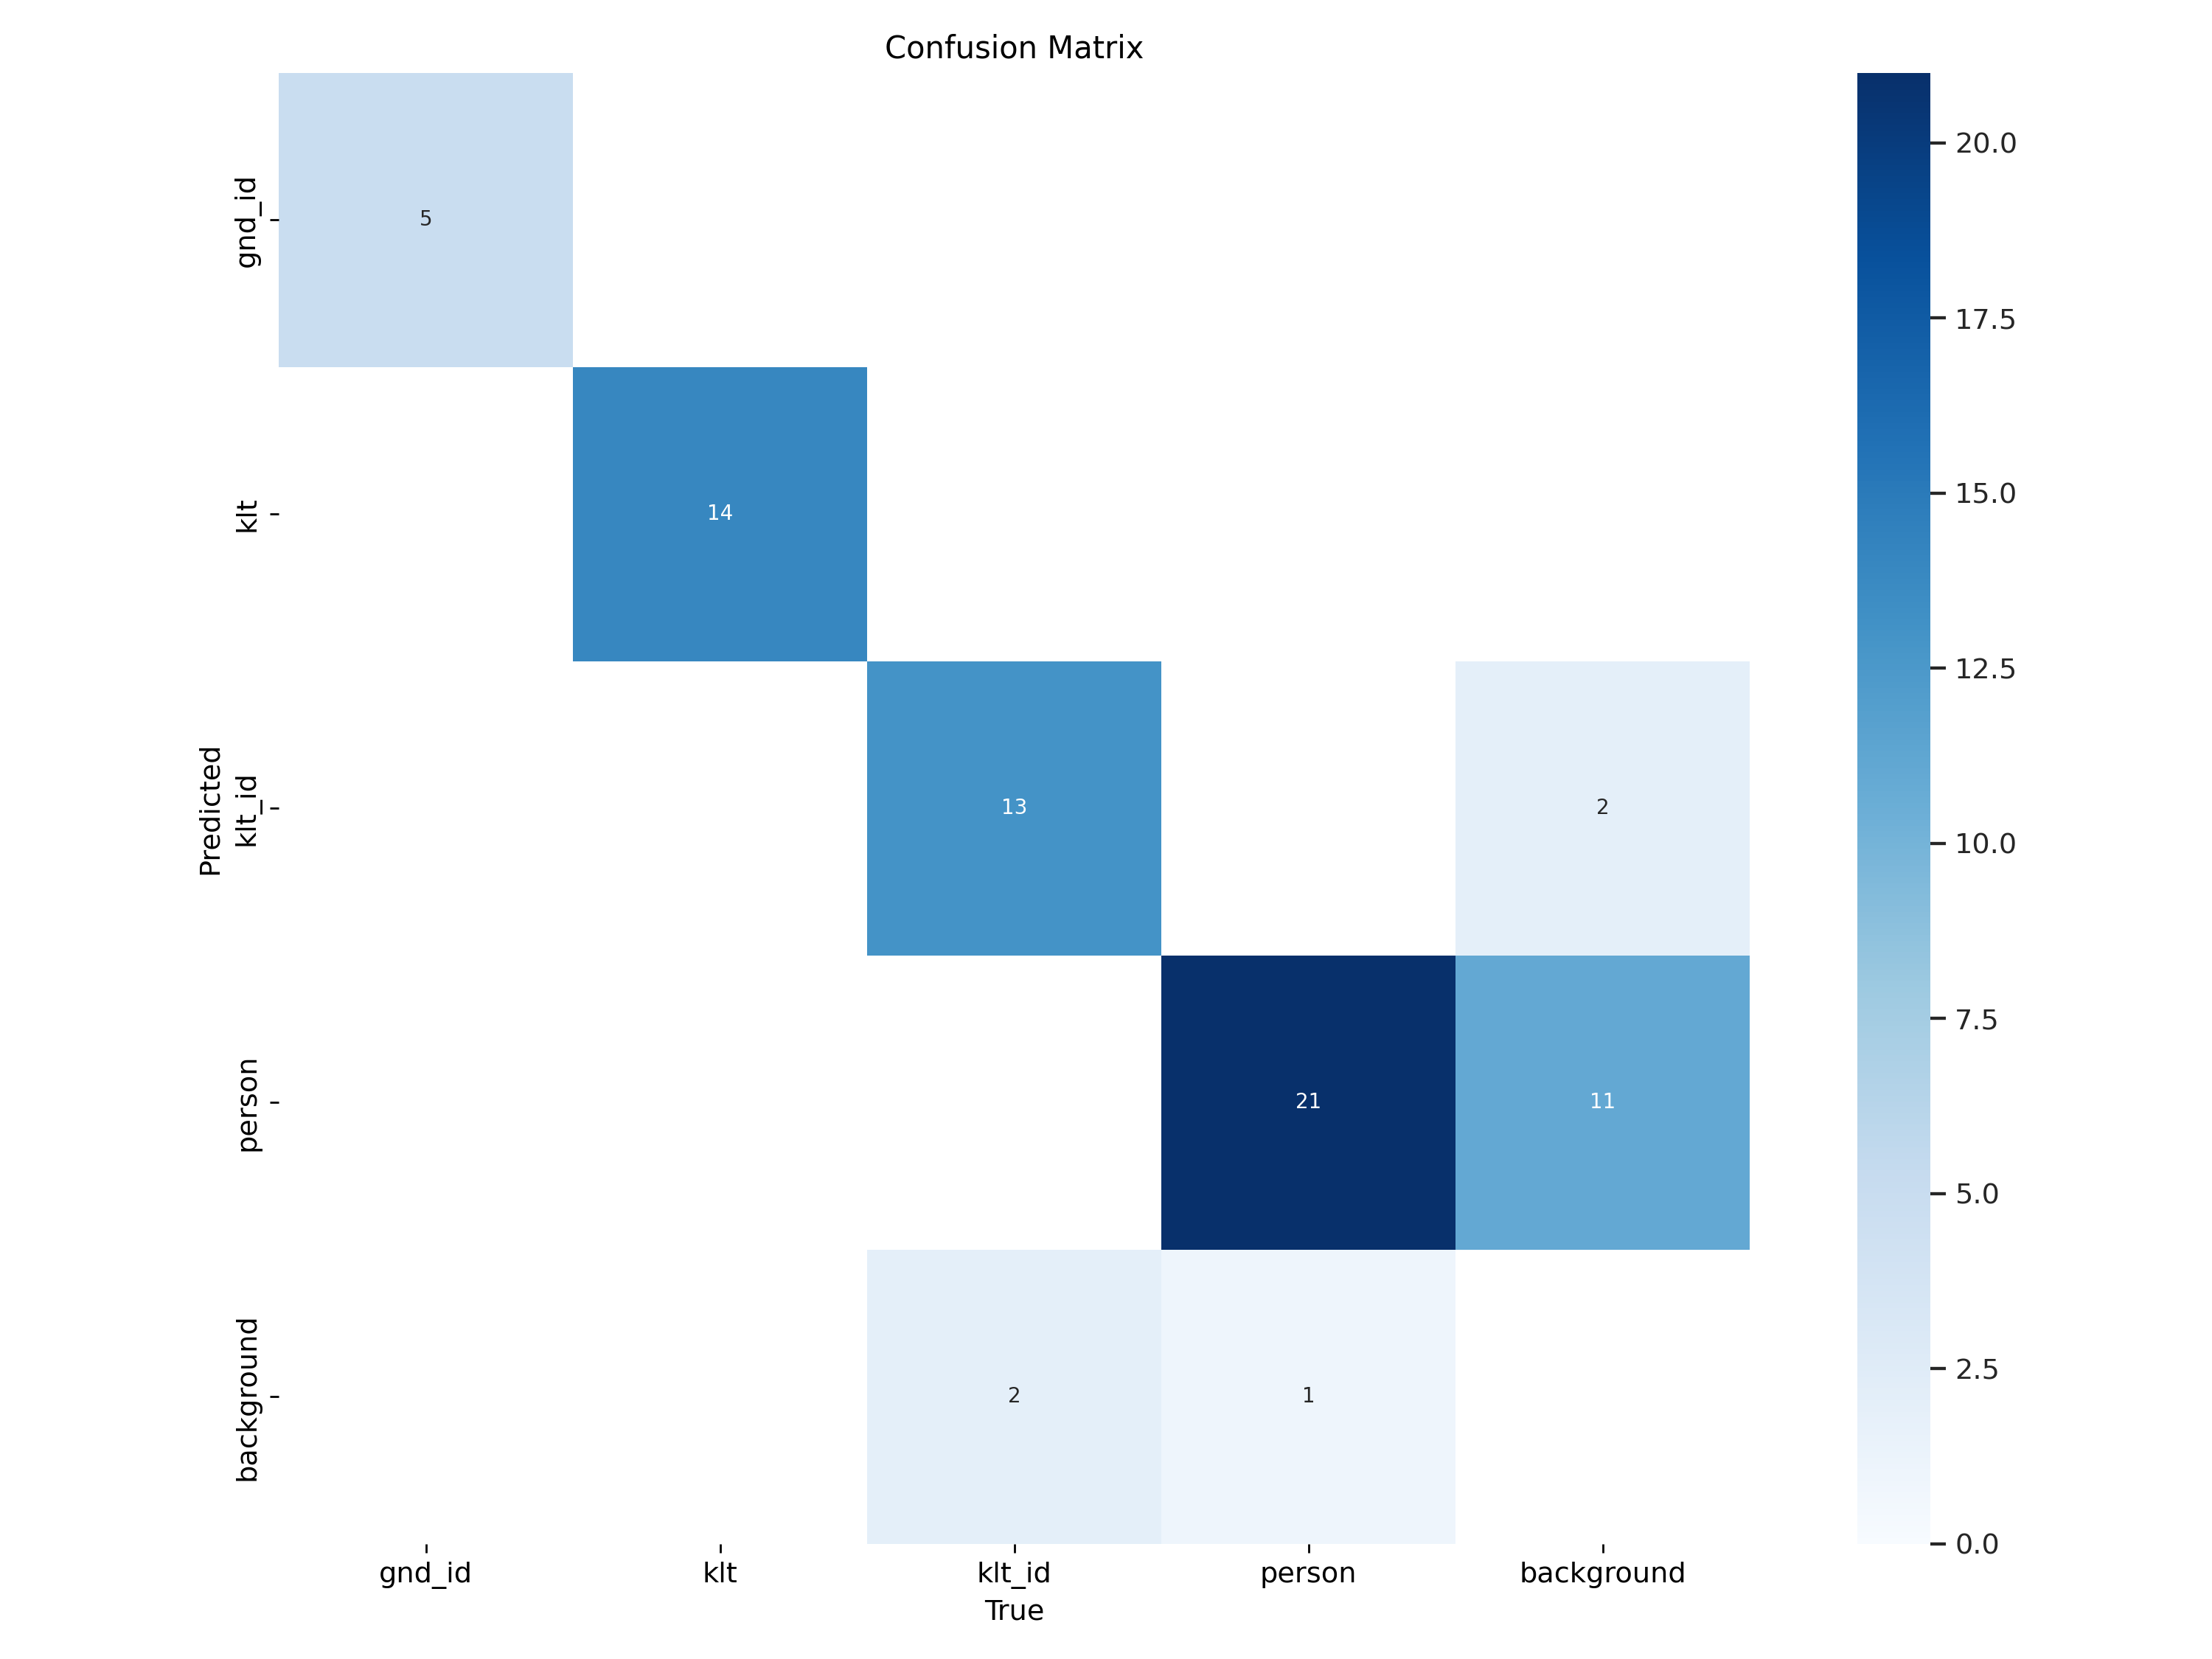

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/workspace


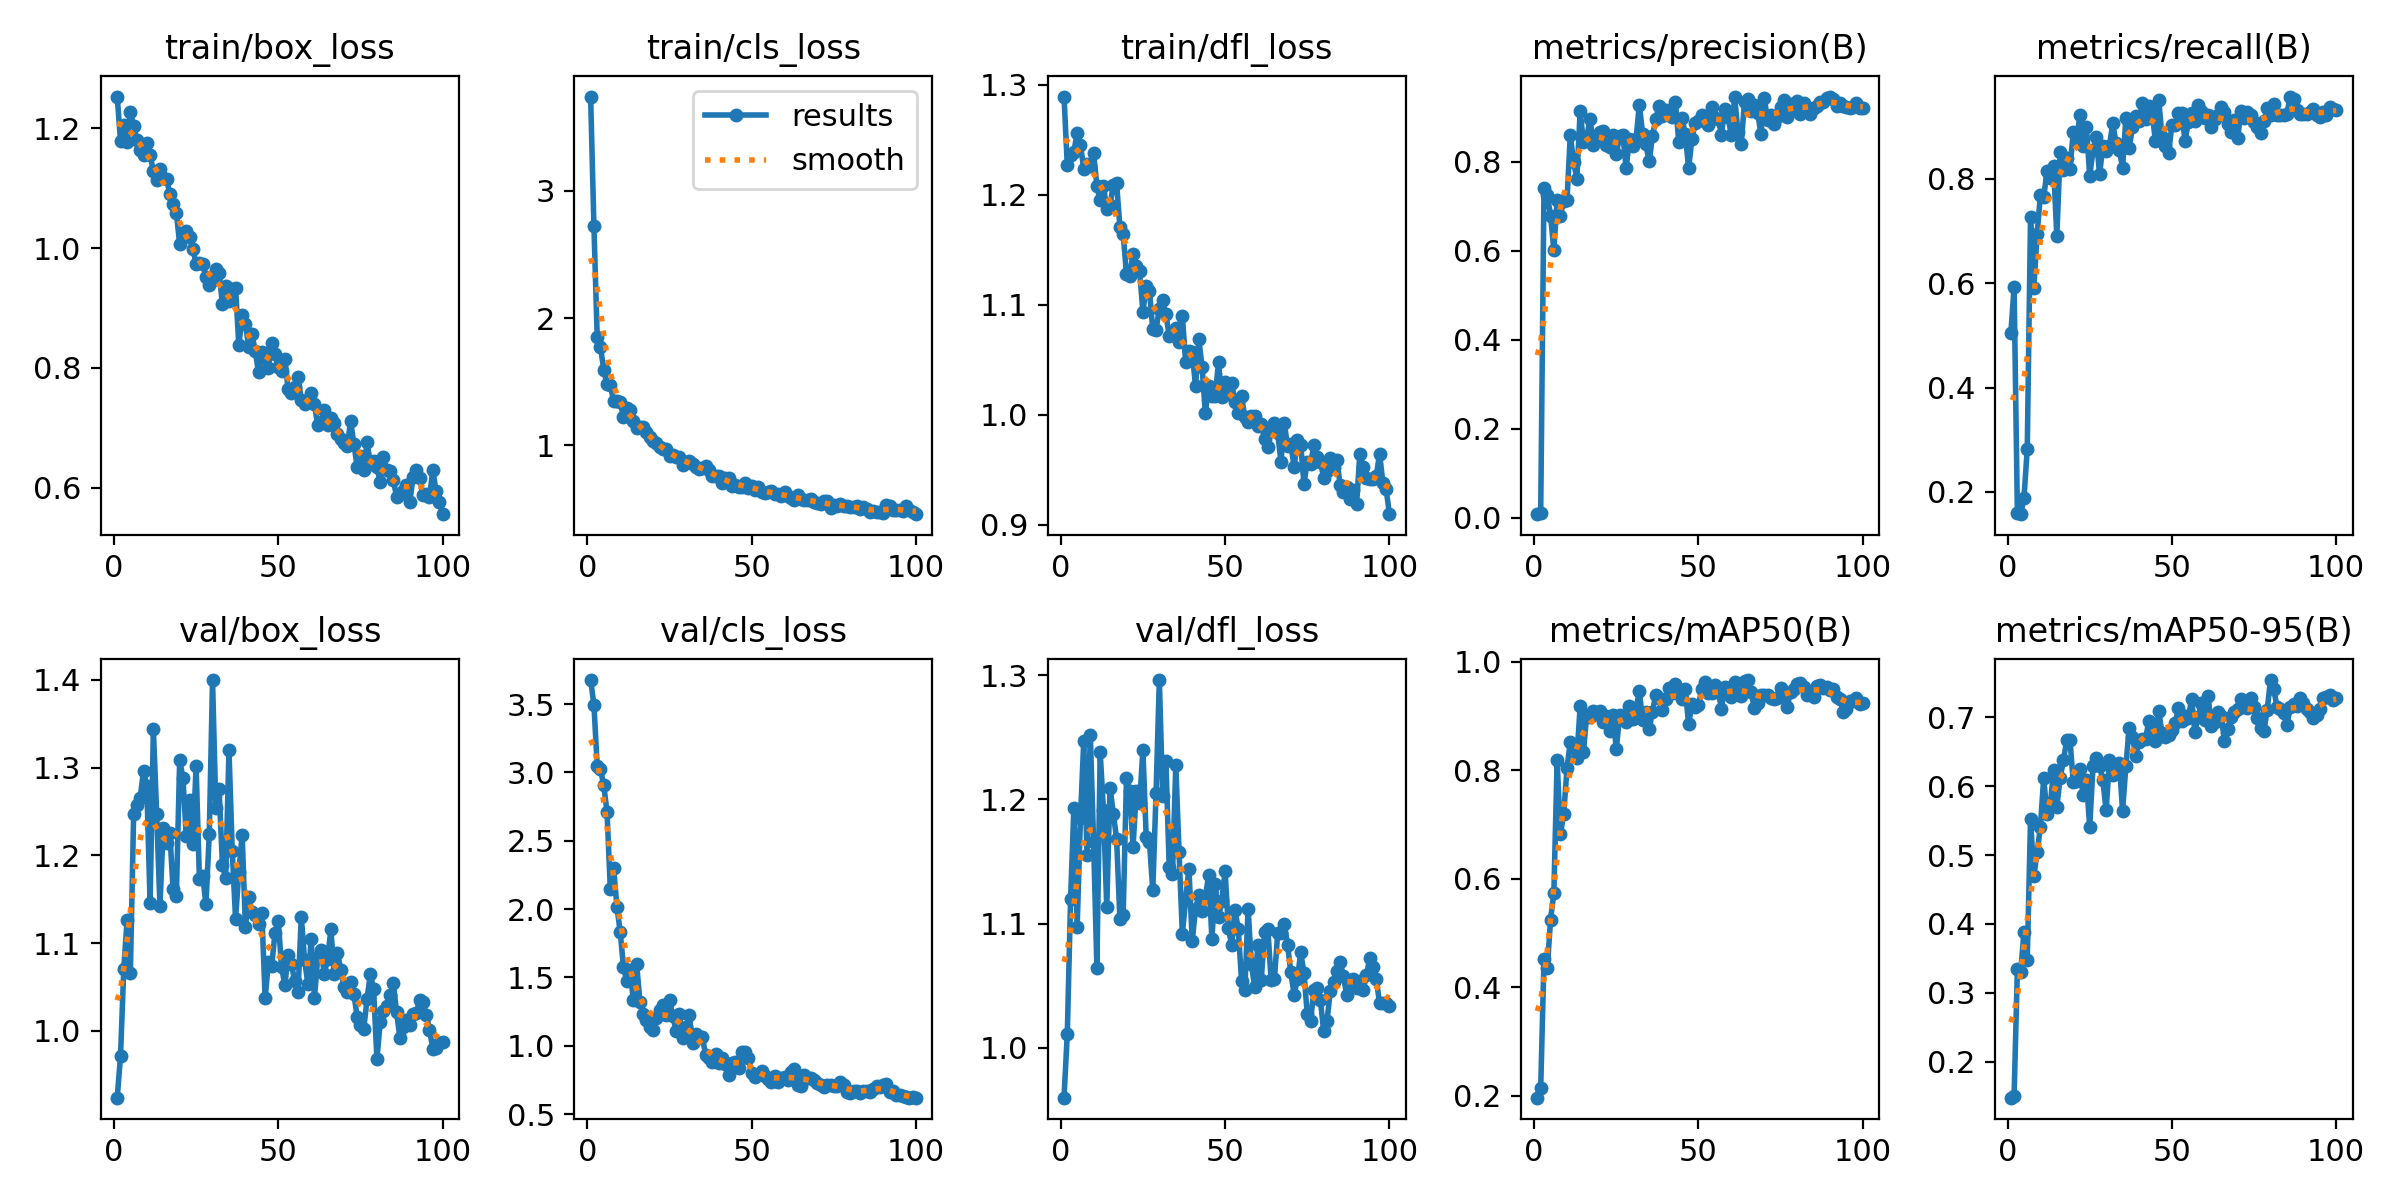

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/workspace


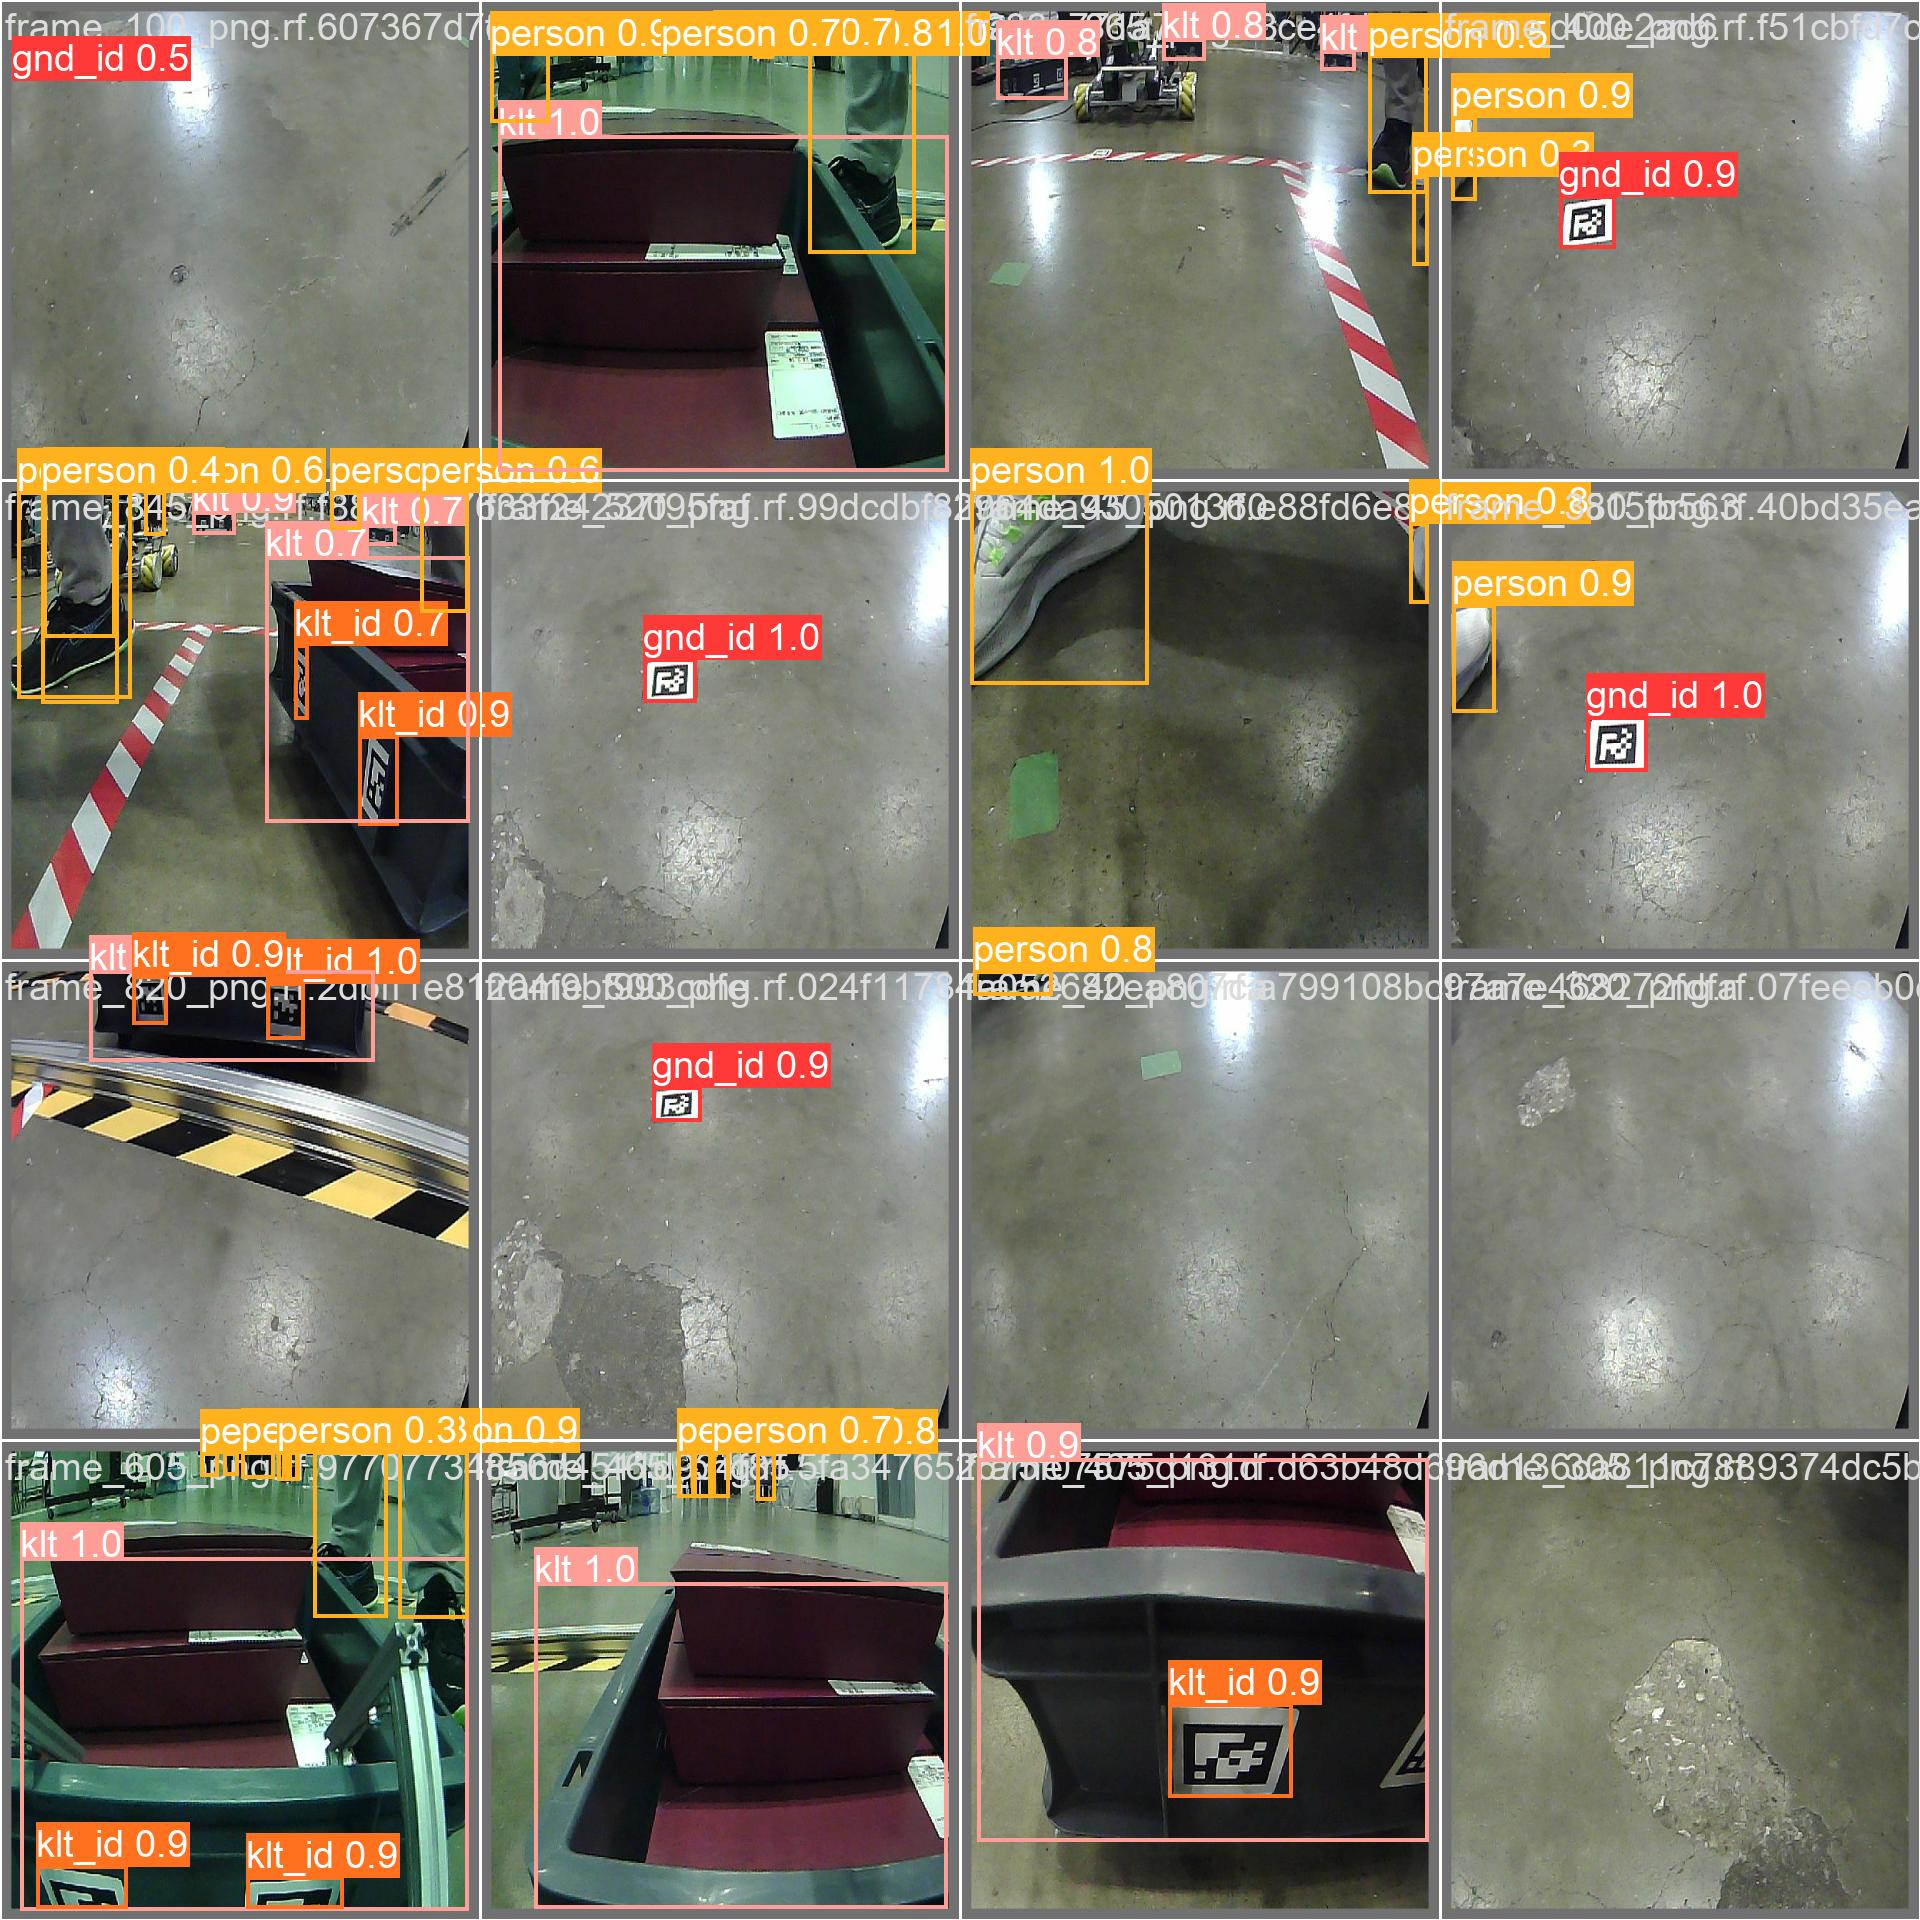

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [16]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/workspace
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 7974MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /workspace/datasets/klt_detection-3/valid/labels.cache... 19 image
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         19         56      0.936      0.922       0.96      0.752
                gnd_id         19          5          1      0.957      0.995      0.912
                   klt         19         14      0.987          1      0.995       0.83
                klt_id         19         15      0.923      0.867      0.925      0.669
                person         19         22      0.836      0.864      0.926      0.595
Speed: 1.9ms preprocess, 25.4ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [17]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/workspace
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 7974MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs

image 1/10 /workspace/datasets/klt_detection-3/test/images/frame_1000_png.rf.5c6bcddbbc02a056dacbd850125e1c37.jpg: 640x640 1 gnd_id, 4.6ms
image 2/10 /workspace/datasets/klt_detection-3/test/images/frame_145_png.rf.876b78acb193e208ee1f1373941cd03d.jpg: 640x640 1 gnd_id, 1 person, 5.0ms
image 3/10 /workspace/datasets/klt_detection-3/test/images/frame_185_png.rf.e951f01571dc0e0a3f85cfe8663876fa.jpg: 640x640 3 persons, 4.3ms
image 4/10 /workspace/datasets/klt_detection-3/test/images/frame_285_png.rf.2c8d4201f7d8916bf00edc353da5fca1.jpg: 640x640 (no detections), 4.2ms
image 5/10 /workspace/datasets/klt_detection-3/test/images/frame_325_png.rf.aa7b3e59892d0f4050220721974fbe45.jpg: 640x640 1 klt, 2 klt_ids, 4.2ms
image 6/10 /workspace/datasets/klt_detection-3/test/images/frame_440_png.rf.2252f4a3c52b2c

**NOTE:** Let's take a look at few results.

In [18]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [23]:
!tar -cvzf runs.tar.gz runs

runs/
runs/detect/
runs/detect/predict/
runs/detect/predict/dog.jpeg
runs/detect/train/
runs/detect/train/weights/
runs/detect/train/weights/last.pt
runs/detect/train/weights/best.pt
runs/detect/train/args.yaml
runs/detect/train/labels_correlogram.jpg
runs/detect/train/labels.jpg
runs/detect/train/train_batch0.jpg
runs/detect/train/train_batch1.jpg
runs/detect/train/train_batch2.jpg
runs/detect/train/results.csv
runs/detect/train/train_batch1170.jpg
runs/detect/train/train_batch1171.jpg
runs/detect/train/train_batch1172.jpg
runs/detect/train/PR_curve.png
runs/detect/train/val_batch0_labels.jpg
runs/detect/train/val_batch0_pred.jpg
runs/detect/train/F1_curve.png
runs/detect/train/P_curve.png
runs/detect/train/R_curve.png
runs/detect/train/confusion_matrix_normalized.png
runs/detect/train/confusion_matrix.png
runs/detect/train/results.png
runs/detect/val/
runs/detect/val/val_batch0_labels.jpg
runs/detect/val/val_batch0_pred.jpg
runs/detect/val/val_batch1_labels.jpg
runs/detect/val/val_ba

### Estimate distance

In [1]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

# Load a model
model = YOLO("runs_4_class/detect/train/weights/best.pt")

In [2]:
model.names

{0: 'gnd_id', 1: 'klt', 2: 'klt_id', 3: 'person'}


0: 480x640 1 klt, 4 klt_ids, 240.9ms
Speed: 9.0ms preprocess, 240.9ms inference, 1865.1ms postprocess per image at shape (1, 3, 480, 640)


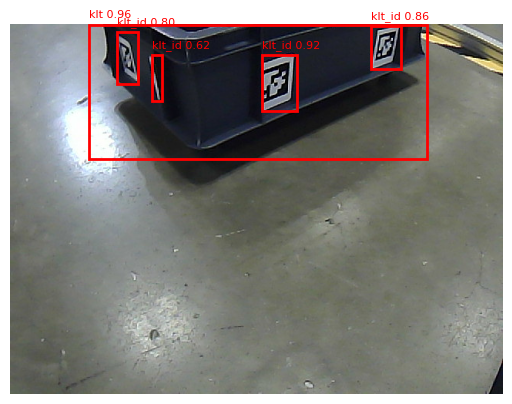

In [3]:
# Load the image using PIL
path = "dataset/may15_run00_cam08/frame_160.png"
image = Image.open(path)

# Perform object detection on the image
results = model.predict(source=image)

# Extract bounding boxes, classes, names, and confidences
boxes = results[0].boxes.xyxy.tolist()
classes = results[0].boxes.cls.tolist()
names = results[0].names
confidences = results[0].boxes.conf.tolist()

# Convert PIL image to array for matplotlib
image_np = np.array(image)

# Create figure and axes
fig, ax = plt.subplots(1)
ax.imshow(image_np)

# Iterate through the results and add bounding boxes to the image
for box, cls, conf in zip(boxes, classes, confidences):
    x1, y1, x2, y2 = box
    width, height = x2 - x1, y2 - y1
    rect = Rectangle((x1, y1), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.text(x1, y1 - 10, f"{names[int(cls)]} {conf:.2f}", color='red', fontsize=8)

# Display the image
plt.axis('off')  # Turn off axis
plt.show()

In [11]:
# Find the largest area of the klt_id bounding box
largest_area = 0

for box, cls, conf in zip(boxes, classes, confidences):
    x1, y1, x2, y2 = box
    width, height = x2 - x1, y2 - y1
    area = width * height
    if area > largest_area and cls == 2:    # only look at klt_ids
        largest_area = area
        largest_box = box
        largest_conf = conf
        largest_cls = cls

print(largest_cls, largest_conf)
print(largest_box)

2.0 0.9153937697410583
[326.5511779785156, 38.67034912109375, 371.7271423339844, 111.96452331542969]


In [14]:
# find the largest side of the bounding box
x1, y1, x2, y2 = largest_box
width, height = x2 - x1, y2 - y1
largest_side = max(width, height)

print(largest_side)

73.29417419433594


In [15]:
np.sqrt(largest_area)

57.5424625895246

The distance to the nearest april tag (appearing the largest) will be proportional to the max length of the bounding box. The distance is calculated using the formula:

```
distance = focal_length * real_tag_width / tag_width
```

where `focal_length` is the focal length of the camera, `real_tag_width` is the real width of the tag, and `tag_width` is the width of the tag in pixels.